# Regression Problem

it's all about `How much and How many`

**Regression** is a statistical technique that involves `predicting a continuous variable` based on the relationship between a dependent variable and one or more independent variables. Regression problems are a common application in machine learning, especially in supervised machine learning. Regression analysis is a key part of predictive modeling and is used in many different applications, including:

* Forecasting stock market prices, inflation, electrical loads, wind speed, tourism demand, and house prices
* Predicting bike usage
* Helping economists and financial analysts with asset valuation
* Helping HR teams determine employee salary hikes

In regression analysis, a model is used to **determine a best-fit line and see how the data is dispersed around this line**. The most common form of regression analysis is linear regression, which uses a specific mathematical criterion to find the line that best fits the data. For example, the method of ordinary least squares minimizes the sum of squared differences between the true data and the line.

The skill of a regression model can be estimated using `root mean squared error (RMSE)`. For the model to be accurate, bias needs to be low. Bias is the tendency of the algorithm to consistently learn the wrong thing by not taking into account all the information in the data.


Architecture of Neural Network Regression

* **Input layer shape** --> Same shape as number of feature (e.g. 3 for bedrooms, bathrooms, car spaces in housing price prediction)
* **Hidden layer** --> Problem spesific, min = 1, max = unlimited
* **Neuron per hidden layer** --> Problem spesific, generally 10 to 100
* **Output layer shape** --> same shape as desired prediction shape (e.g. 1 for house price )
* **Hidden activation** --> Usually `ReLU`
* **Output activation** --> `None`, `ReLU`, `logistic/tanh`
* **Loss function** --> `MSE` or `MAE` / `Huber` ( combination of MAE/MSE) if outliers
* **Optimizer** --> `SGD`, `Adam`

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.0


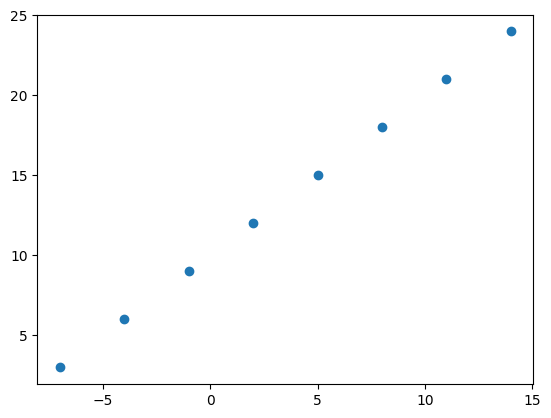

In [ ]:
# Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
# Relationship X and y
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shape

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn on NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

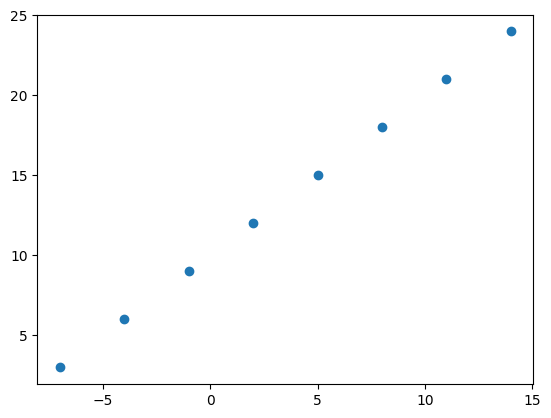

In [ ]:
plt.scatter(X, y);

## Steps in modelling with TensorFlow

1. **Create a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compile the model** - define the loss function, the optimizer, and the evaluation metrics for the model
3. **Fit the model** - letting the model try to find patterns between X and y
4. **Evaluate the model**

## Build model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - loss: 19.8408 - mae: 19.8408
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 19.5595 - mae: 19.5595
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 19.2783 - mae: 19.2783
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 18.9970 - mae: 18.9970
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 18.7158 - mae: 18.7158


In [ ]:
# Check out X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[-18.460533]], dtype=float32)

## Improving our model

1. **Adding layers**
2. **Increase number of hidden layers**
3. **Change the activation**
4. **Change the optimization**
5. **Change learning rate**
6. **Fitting on more data**
7. **Fitting for longer**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), # Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model (more epoch)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step - loss: 21.4315 - mae: 21.4315
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 21.0383 - mae: 21.0383
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 20.6452 - mae: 20.6452
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 20.3068 - mae: 20.3068
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 20.0256 - mae: 20.0256
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 19.7443 - mae: 19.7443
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 19.4631 - mae: 19.4631
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 19.1818 - mae: 19.1818
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 18.9006 - mae: 18.9006
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 18.6193 - mae: 18.6193
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 18.3381 - mae: 18.3381
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 18.0568 - mae: 18.0568
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[29.338902]], dtype=float32)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model (more epoch)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 12.6244 - mae: 12.6244
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.8957 - mae: 11.8957
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.1603 - mae: 11.1603
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.4168 - mae: 10.4168
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 9.6633 - mae: 9.6633
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.8972 - mae: 8.8972
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.1162 - mae: 8.1162
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.3174 - mae: 7.3174
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 6.7837 - mae: 6.7837
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 6.9463 - mae: 6.9463
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.2258 - mae: 7.2258
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.4391 - mae: 7.4391
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32

In [ ]:
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[27.220407]], dtype=float32)

## Evaluating a model

> "Visualize, Visualize, Visualize"

* The data
* The model itself
* The training of a model
* The predictions of the model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

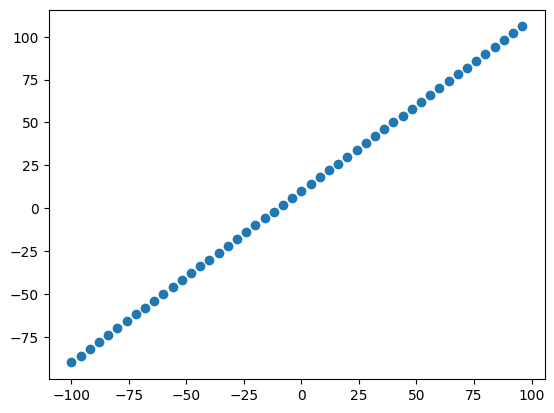

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
y = tf.range(-90, 110, 4)

# Visualize it
plt.scatter(X, y);

### The 3 sets...

* Training set - the model learn this data, around 70-80% of full data
* Validation set - the model gets tuned on this data, 10-15% of full data
* Test data - the model gets evaluated on this data, 10-15% of full data



In [ ]:
# Check the length of how many we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # 80% of data
y_train = y[:40]

X_test = X[40:] # 20% of data
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

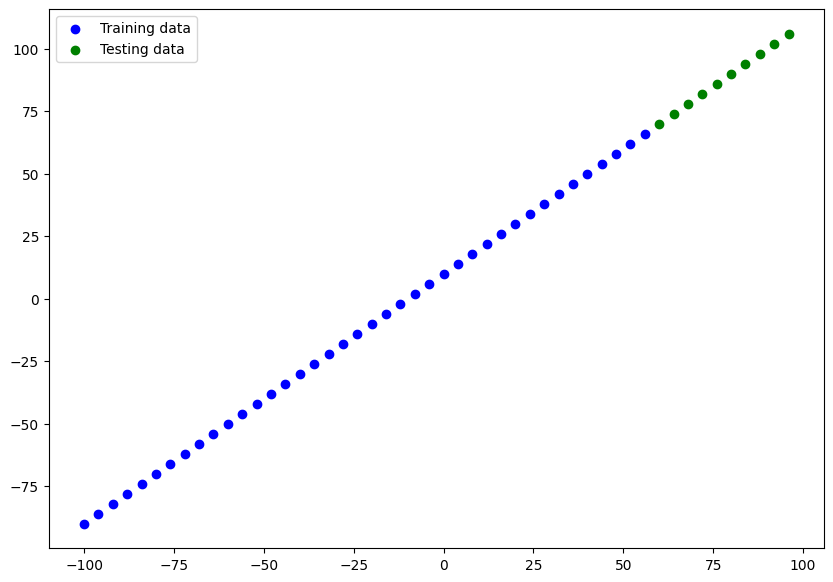

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show the legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1)
], name='model_1_oy')

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Visualizing the model

In [ ]:
model.summary()

Model: "model_1_oy"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model
* Trainable params - parameters in the model that can be updated during training
* Non-trainable params - parameters in the model that cannot be updated during training

In [ ]:
# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 48.4873 - mae: 48.4873  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 43.7061 - mae: 43.7061 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.4016 - mae: 29.4016 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.0133 - mae: 19.0133 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.4064 - mae: 17.4064 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.3851 - mae: 26.3851 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 19.9081 - mae: 19.9081 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.2759 - mae: 10.2759
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20.5314 - mae: 20.5314 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.4966 - mae: 8.4966 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.0273 - mae: 11.0273
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.3217 - mae: 13.3217 
Epoch 13/100
2/2 ━━━━━━━━━━━

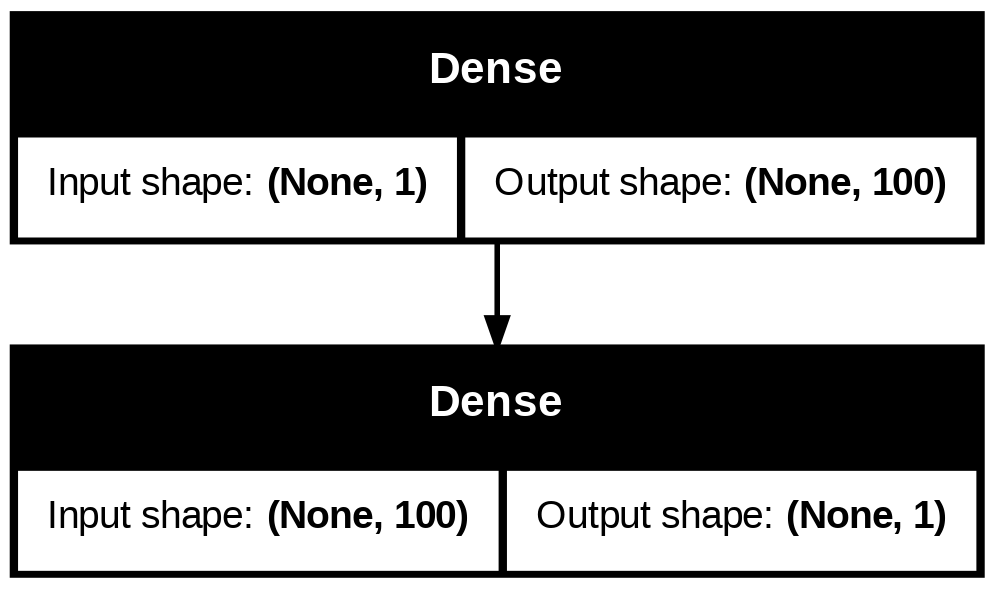

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, its a good idea to plot them against the ground truth labels.

Often youll see this in the form of `y_test` and `y_pred` versus `X_test` and `X_pred`.

In [ ]:
# Make some predictions
y_preds = model.predict(tf.expand_dims(X_test, axis=-1))
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


array([[ 63.51122 ],
       [ 67.639786],
       [ 71.76836 ],
       [ 75.89695 ],
       [ 80.02553 ],
       [ 84.15408 ],
       [ 88.28267 ],
       [ 92.41123 ],
       [ 96.539825],
       [100.668396]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Lets create a plotting function to visualize our model's predictions
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):

  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend();

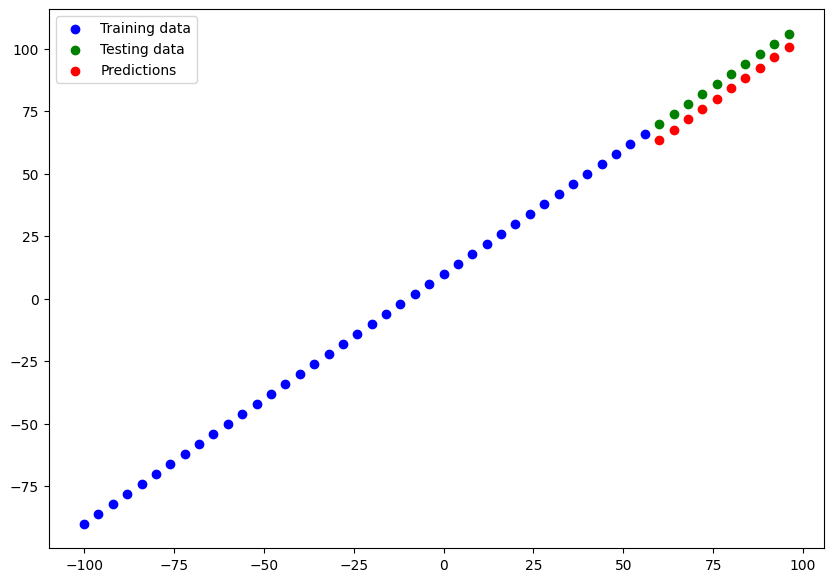

In [ ]:
plot_predictions(predictions=y_preds)

### Evaluating our model predictions with regression evaluation metric

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions".
`tf.keras.losses.MAE()` or `tf.metrics.mean_absolute_error()`. **When to use?** As a great starter metric for any regression problem.

* MSE - mean square error, "square the average errors".
`tf.keras.losses.MSE()` or `tf.metrics.mean_square_error()`. **When to use?** When larger errors are more significant than smaller errors.

* Huber - `tf.keras.losses.Huber()`. Combination of MSE and MAE. Less sensitive to outliers than MSE.

In [ ]:
# Evaluate the model on the test
model.evaluate(tf.expand_dims(X_test, axis=-1), y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 5.9102 - mae: 5.9102


[5.910195350646973, 5.910195350646973]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.MeanAbsoluteError()
mae.update_state(y_test, y_preds)
result = mae.result().numpy()
result

5.9101954

In [ ]:
y_preds

array([[ 71.21135 ],
       [ 75.84962 ],
       [ 80.48786 ],
       [ 85.12612 ],
       [ 89.764366],
       [ 94.40263 ],
       [ 99.04087 ],
       [103.67913 ],
       [108.317375],
       [112.955635]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate the mean square error
mse = tf.metrics.MeanSquaredError()
mse.update_state(y_test, y_preds)
result = mse.result().numpy()
result

35.066795

In [ ]:
# Make some function to MAE and MSE
def mae(y_true, y_pred):
  """
  Calculates the mean absolute error between two arrays.
  """
  mae = tf.metrics.MeanAbsoluteError()
  mae.update_state(y_test, y_pred)
  result = mae.result().numpy()
  return result

def mse(y_true, y_pred):
  """
  Calculates the mean square error between two arrays.
  """
  mse = tf.metrics.MeanSquaredError()
  mse.update_state(y_test, y_pred)
  result = mse.result().numpy()
  return result

In [ ]:
mae(y_test, y_preds), mse(y_test, y_preds)

(5.9101954, 35.066795)

### Running Experiments to improve our model

1. Get more data
2. Make yout model larger ( using more complex models )
3. Train for longer

Let's do 3 modelling experiments:

1. `model_1` - 1 layer, 100 epoch
2. `model_2` - 2 layer, 100 epoch
3. `model_3` - 2 layer, 500 epoch
4. `model_4` -
5. `model_5` -

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 60.5661 - mae: 60.5661 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.9605 - mae: 25.9605 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.9280 - mae: 10.9280
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 10.4180 - mae: 10.4180
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.9526 - mae: 9.9526   
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.6311 - mae: 11.6311 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.5936 - mae: 8.5936 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.0624 - mae: 10.0624 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.7767 - mae: 11.7767 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.7034 - mae: 8.7034 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.1721 - mae: 10.1721 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9268 - mae: 11.9268 
Epoch 13/100
2/2 ━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


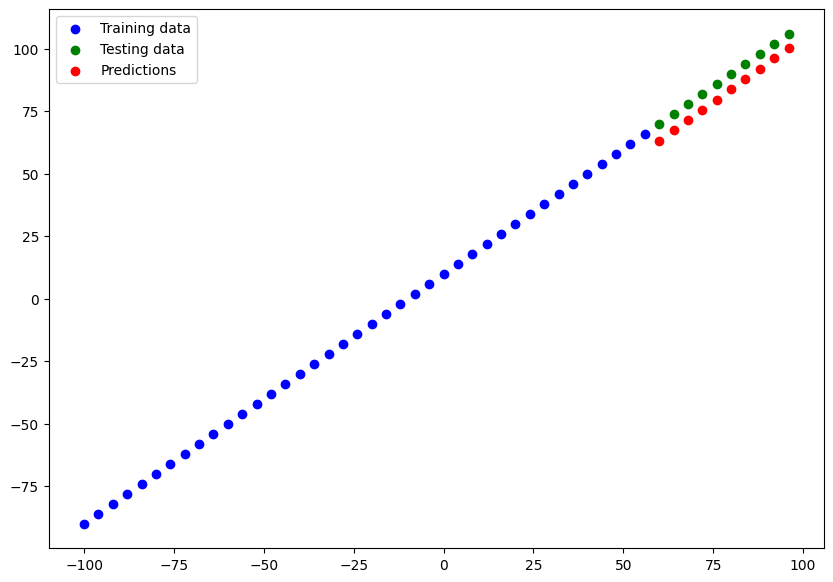

In [ ]:
# Make and plot predictions for model_1
y_preds_model_1 = model_1.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_model_1)

In [ ]:
# Evaluation model_1
mae_1 = mae(y_test, y_preds_model_1)
mse_1 = mse(y_test, y_preds_model_1)
mae_1, mse_1

(6.24781, 39.155617)

**Build `model_2`**
* 2 Dense layer, 100 epoch

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model_2
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model_2
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 71.6868 - mae: 71.6868 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42.3447 - mae: 42.3447 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.9492 - mae: 12.9492 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.5085 - mae: 16.5085 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.9693 - mae: 10.9693
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.3722 - mae: 12.3722 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.0480 - mae: 14.0480 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.2059 - mae: 13.2059 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.9052 - mae: 15.9052 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.5380 - mae: 10.5380
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.5961 - mae: 11.5961 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.7003 - mae: 12.7003 
Epoch 13/100
2/2 ━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


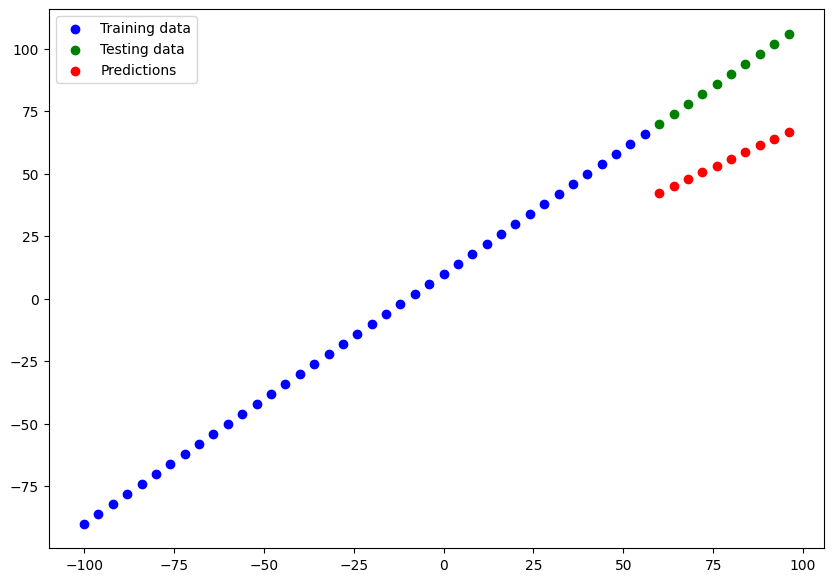

In [ ]:
# Make and plot predictions for model_2
y_preds_model_2 = model_2.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_model_2)

In [ ]:
# Evaluation model_2
mae_2 = mae(y_test, y_preds_model_2)
mse_2 = mse(y_test, y_preds_model_2)
mae_2, mse_2

(33.396843, 1129.3259)

**Build `model_3`**
* 2 layers, 500 epoch

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create model_3
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile model_3
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model_3
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 85.2820 - mae: 85.2820 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 33.3029 - mae: 33.3029
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.0860 - mae: 11.0860
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.7884 - mae: 15.7884 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.2673 - mae: 12.2673 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 13.6641 - mae: 13.6641 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 17.0628 - mae: 17.0628
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7071 - mae: 9.7071 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.7522 - mae: 10.7522 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.8283 - mae: 11.8283 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.9488 - mae: 12.9488 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.1561 - mae: 15.1561 
Epoch 13/500
2/2 ━━━━━━━━━━

In [ ]:
# Make and plot predictions for model_3
y_preds_model_3 = model_3.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_model_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


NameError: name 'plot_predictions' is not defined

In [ ]:
# Evaluation model_3
mae_3 = mae(y_test, y_preds_model_3)
mse_3 = mse(y_test, y_preds_model_3)
mae_3, mse_3

(48.705242, 2427.0325)

### Comparing the results of our experiments

In [ ]:
# Lets compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1, mse_1],
                 ['model_2', mae_2, mse_2],
                 ['model_3', mae_3, mse_3]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,6.247810,39.155617
1,model_2,33.396843,1129.325928
2,model_3,1.147166,1.633542


Looks like `model_3` performed the best...

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

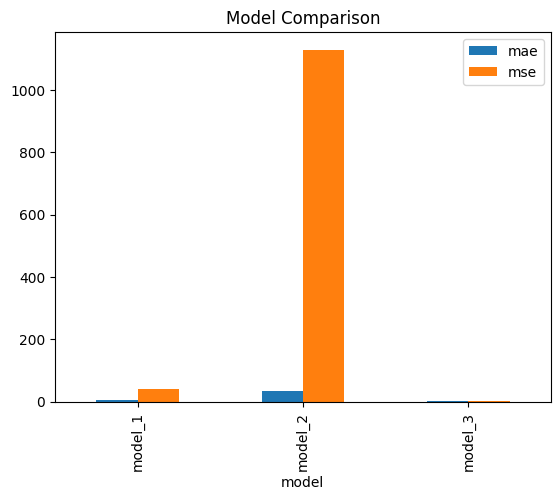

In [ ]:
all_results.plot(x="model", y=["mae", "mse"], kind="bar", title="Model Comparison");

### Saving our models

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Export model using the SavedModel format
model_3.export("best_model_SavedModel_format")

Saved artifact at 'best_model_SavedModel_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  132153598589440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132153596629360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132153598579232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132153596631648: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# Save model using the HDF5 format
model_3.save('best_model_HDF5_format.h5')

### Load Model

In [ ]:
# Load in the SavedModel format
loaded_SavedModel_format = tf.keras.layers.TFSMLayer('best_model_SavedModel_format')
loaded_SavedModel_format

<TFSMLayer name=tfsm_layer_1, built=True>

In [ ]:
loaded_HDF5_format = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_HDF5_format.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Download a model (or any other files)

In [1]:
from google.colab import files

files.download('best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp best_model_HDF5_format.h5 /content/drive/MyDrive/